In [1]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import calendar

In [30]:
df = pd.read_csv("../../data/loureiro_40casas.csv")
df.Time = pd.to_datetime(df.Time)
df

,Time,Energy_1,Energy_2,Energy_9,Energy_15,Energy_16,Energy_17,Energy_30,Energy_35,Energy_48,...,Energy_138,Energy_139,Energy_142,Energy_146,Energy_148,Energy_151,Energy_159,Energy_160,Energy_161,Energy_164
0,2022-05-05 12:00:00,0.068,0.018,0.024,0.164,0.072,0.055,0.006,0.080,0.062,...,0.052,0.083,0.084,0.068,0.060,0.042,0.055,0.069,0.010,0.004
1,2022-05-05 12:15:00,0.070,0.018,0.024,0.135,0.058,0.060,0.006,0.056,0.062,...,0.052,0.053,0.004,0.048,0.078,0.053,0.055,0.063,0.010,0.003
2,2022-05-05 12:30:00,0.122,0.018,0.024,0.121,0.011,0.096,0.006,0.052,0.062,...,0.052,0.035,0.004,0.062,0.061,0.057,0.055,0.049,0.010,0.004
3,2022-05-05 12:45:00,0.132,0.018,0.024,0.138,0.010,0.064,0.006,0.052,0.062,...,0.052,0.082,0.004,0.056,0.125,0.034,0.055,0.097,0.010,0.004
4,2022-05-05 13:00:00,0.125,0.018,0.024,0.104,0.011,0.072,0.006,0.053,0.062,...,0.052,0.076,0.004,0.034,0.070,0.038,0.055,0.075,0.010,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38014,2023-06-07 01:15:00,0.120,0.020,0.066,0.120,0.003,0.094,0.037,0.045,0.071,...,0.047,0.054,0.004,0.080,0.014,0.028,0.066,0.058,0.000,0.003
38015,2023-06-07 01:30:00,0.121,0.004,0.057,0.087,0.002,0.077,0.036,0.046,0.059,...,0.051,0.038,0.004,0.060,0.028,0.023,0.067,0.032,0.016,0.004
38016,2023-06-07 01:45:00,0.158,0.007,0.056,0.086,0.003,0.087,0.021,0.045,0.059,...,0.068,0.045,0.004,0.057,0.029,0.043,0.065,0.495,0.008,0.003
38017,2023-06-07 02:00:00,0.102,0.042,0.056,0.085,0.002,0.072,0.027,0.045,0.059,...,0.067,0.053,0.003,0.061,0.012,0.047,0.041,0.274,0.000,0.004


In [17]:
df_total = pd.DataFrame(df.sum(axis=1))
df_total.columns = ['Energy']
df_total

,Energy
0,2.955
1,2.652
2,2.593
3,2.691
4,2.685
...,...
38014,1.820
38015,1.751
38016,2.252
38017,2.034


In [28]:
df_location = pd.read_csv("../../data/loureiro_40casas_location.csv")
df_location

,Time,Energy,Location
0,2022-05-05 12:00:00,0.068,Energy_1
1,2022-05-05 12:15:00,0.070,Energy_1
2,2022-05-05 12:30:00,0.122,Energy_1
3,2022-05-05 12:45:00,0.132,Energy_1
4,2022-05-05 13:00:00,0.125,Energy_1
...,...,...,...
1520755,2023-06-07 01:15:00,0.003,Energy_164
1520756,2023-06-07 01:30:00,0.004,Energy_164
1520757,2023-06-07 01:45:00,0.003,Energy_164
1520758,2023-06-07 02:00:00,0.004,Energy_164


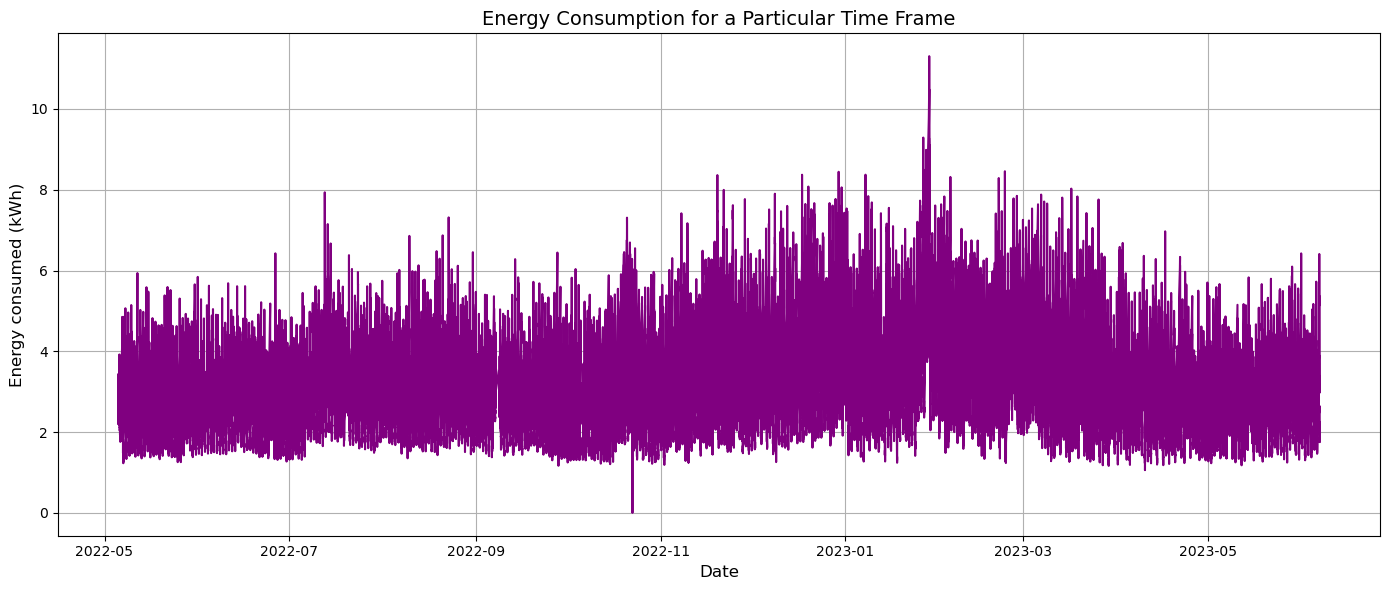

In [33]:
plt.figure(figsize=(14,6))
plt.plot(df["Time"], df_total, color='purple')
plt.ylabel('Energy consumed (kWh)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Energy Consumption for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

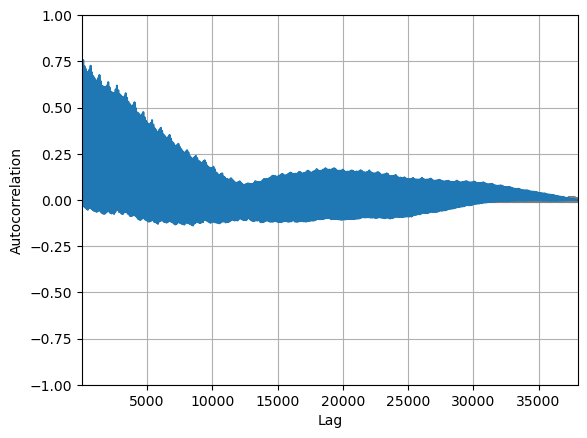

In [34]:
autocorrelation_plot(df_total)

## Visualize by day of week

### Loureiro Dataset

In [35]:
df_location

,Time,Energy,Location
0,2022-05-05 12:00:00,0.068,Energy_1
1,2022-05-05 12:15:00,0.070,Energy_1
2,2022-05-05 12:30:00,0.122,Energy_1
3,2022-05-05 12:45:00,0.132,Energy_1
4,2022-05-05 13:00:00,0.125,Energy_1
...,...,...,...
1520755,2023-06-07 01:15:00,0.003,Energy_164
1520756,2023-06-07 01:30:00,0.004,Energy_164
1520757,2023-06-07 01:45:00,0.003,Energy_164
1520758,2023-06-07 02:00:00,0.004,Energy_164


In [36]:
df_location.isna().any()

Time        False
Energy      False
Location    False
dtype: bool

In [37]:
df_location['Time'] = pd.to_datetime(df_location['Time'])
df_location['DayOfWeek'] = df_location['Time'].dt.dayofweek
df_location['Weekend'] = df_location['Time'].dt.dayofweek.isin([5, 6]).astype(int)
df_location['Hour'] = df_location['Time'].dt.hour
df_location['Month'] = df_location['Time'].dt.month
df_location

,Time,Energy,Location,DayOfWeek,Weekend,Hour,Month
0,2022-05-05 12:00:00,0.068,Energy_1,3,0,12,5
1,2022-05-05 12:15:00,0.070,Energy_1,3,0,12,5
2,2022-05-05 12:30:00,0.122,Energy_1,3,0,12,5
3,2022-05-05 12:45:00,0.132,Energy_1,3,0,12,5
4,2022-05-05 13:00:00,0.125,Energy_1,3,0,13,5
...,...,...,...,...,...,...,...
1520755,2023-06-07 01:15:00,0.003,Energy_164,2,0,1,6
1520756,2023-06-07 01:30:00,0.004,Energy_164,2,0,1,6
1520757,2023-06-07 01:45:00,0.003,Energy_164,2,0,1,6
1520758,2023-06-07 02:00:00,0.004,Energy_164,2,0,2,6


In [38]:
df_weekly = df_location.groupby(['DayOfWeek']).mean()
df_weekly.drop(['Hour', 'Weekend', 'Month'], inplace=True, axis=1)
df_weekly

,Energy
DayOfWeek,
0,0.078193
1,0.076843
2,0.077274
3,0.077027
4,0.076816
5,0.084090
6,0.083419


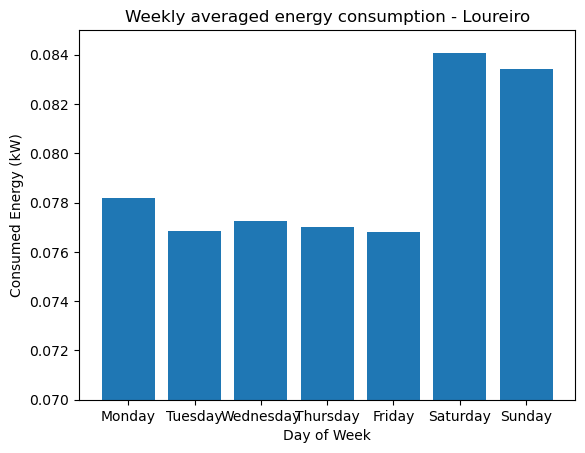

In [55]:
plt.bar(list(calendar.day_name), df_weekly['Energy'])
plt.xlabel("Day of Week")
plt.ylabel("Consumed Energy (kW)")
plt.title("Weekly averaged energy consumption - Loureiro")
plt.ylim(0.07,0.085)
plt.savefig("../../images/weekly_consumption_loureiro.png")
plt.show()

In [49]:
df_hourly = df_location.groupby(['Hour']).mean()
df_hourly.drop(['DayOfWeek', 'Weekend', 'Month'], inplace=True, axis=1)
df_hourly

,Energy
Hour,
0,0.067845
1,0.059095
2,0.052975
3,0.047721
4,0.046500
5,0.044945
6,0.053639
7,0.070362
8,0.073964


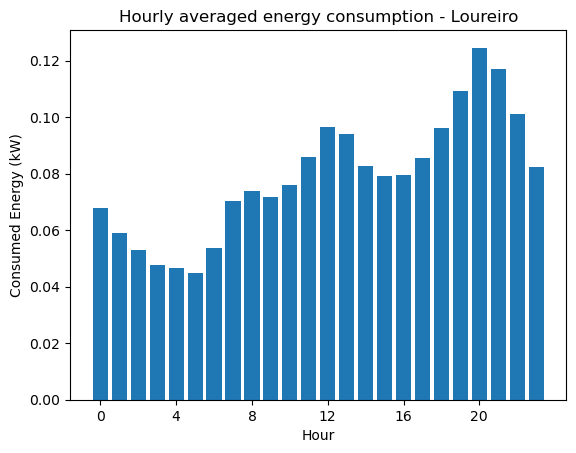

In [54]:
plt.bar(range(len(df_hourly)), df_hourly['Energy'])
plt.xlabel("Hour")
plt.ylabel("Consumed Energy (kW)")
plt.title("Hourly averaged energy consumption - Loureiro")
plt.xticks(list([0,4,8,12,16,20]))
plt.savefig("../../images/hourly_consumption_loureiro.png")
plt.show()

In [51]:
df_monthly = df_location.groupby(['Month']).sum()
df_monthly.drop(['DayOfWeek', 'Weekend', 'Hour'], inplace=True, axis=1)
df_monthly

,Energy
Month,
1,11528.953500
2,10152.419500
3,10067.305200
4,8314.242500
5,15317.972000
6,9732.996000
7,9274.036000
8,9076.219000
9,7801.994815


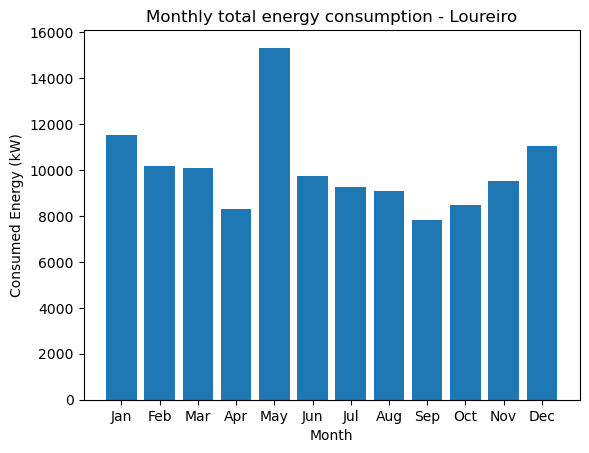

In [53]:
plt.bar(list(calendar.month_abbr[1:]), df_monthly['Energy'])
plt.xlabel("Month")
plt.ylabel("Consumed Energy (kW)")
plt.title("Monthly total energy consumption - Loureiro")
#plt.grid(True)
plt.savefig("../../images/monthly_consumption_loureiro.png")
plt.show()

#### Meteorology comparison

In [57]:
loureiro_meteo = pd.read_csv("../../data/loureiro_meteo.csv")
loureiro_meteo

,Time,Location,Temp_Med,Temp_Max,Temp_Min,Rumo_Vento_Med,Rumo_Vento_Max,Intensidade_Vento_Med,Intensidade_Vento_Max,Precip,Rad_Total,Energy
0,2022-05-05 12:00:00,Energy_1,16.80,16.90,16.60,167.0,179.0,1.40,2.40,0.00,0.0,0.068
1,2022-05-05 12:15:00,Energy_1,16.65,16.85,16.50,172.0,165.5,1.55,2.45,0.00,0.0,0.070
2,2022-05-05 12:30:00,Energy_1,16.50,16.60,16.40,171.0,175.0,1.20,2.30,0.00,0.0,0.122
3,2022-05-05 12:45:00,Energy_1,16.40,16.60,16.30,167.0,171.5,1.20,2.30,0.00,0.0,0.132
4,2022-05-05 13:00:00,Energy_1,16.40,16.50,16.40,163.0,172.0,1.30,2.50,0.00,0.0,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...
1520755,2023-06-07 01:15:00,Energy_164,16.40,16.50,16.30,340.0,338.0,2.50,3.40,0.00,0.0,0.003
1520756,2023-06-07 01:30:00,Energy_164,16.40,16.50,16.35,335.0,338.5,2.05,2.90,0.05,0.0,0.004
1520757,2023-06-07 01:45:00,Energy_164,16.50,16.50,16.40,333.0,313.0,1.80,2.70,0.10,0.3,0.003
1520758,2023-06-07 02:00:00,Energy_164,16.50,16.60,16.40,337.5,342.0,2.20,2.90,0.05,0.0,0.004


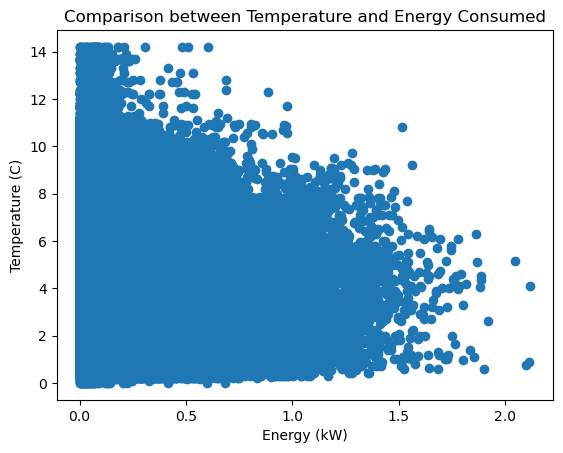

In [65]:
plt.scatter(loureiro_meteo['Energy'], loureiro_meteo['Temp_Med'])
plt.xlabel('Energy (kW)') 
plt.ylabel('Temperature (C)')
plt.title('Comparison between Temperature and Energy Consumed')
plt.show()

### One house only

In [77]:
df_house = df[["Time", "Energy_1"]]
df_house

,Time,Energy_1
0,2022-05-05 12:00:00,0.068
1,2022-05-05 12:15:00,0.070
2,2022-05-05 12:30:00,0.122
3,2022-05-05 12:45:00,0.132
4,2022-05-05 13:00:00,0.125
...,...,...
38014,2023-06-07 01:15:00,0.120
38015,2023-06-07 01:30:00,0.121
38016,2023-06-07 01:45:00,0.158
38017,2023-06-07 02:00:00,0.102


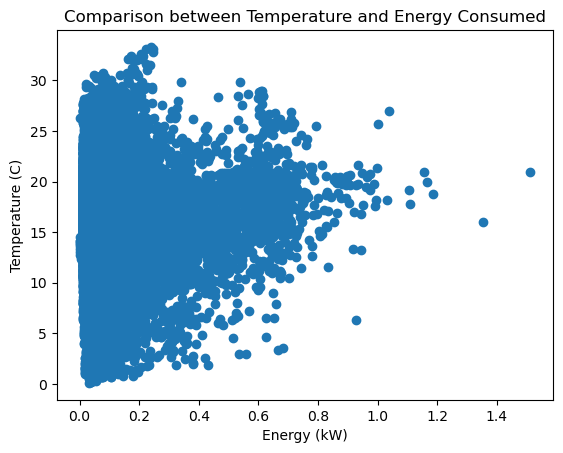

In [79]:
plt.scatter(df_house['Energy_1'], loureiro_meteo['Temp_Med'][:38019])
plt.xlabel('Energy (kW)') 
plt.ylabel('Temperature (C)')
plt.title('Comparison between Temperature and Energy Consumed')
plt.show()